In [1]:
import numpy as np 
import pandas as pd 


import missingno as msno



In [2]:
rain_data = pd.read_csv("weatherAUS.csv")
print(rain_data.head(10))

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1     

In [3]:
rain_data.shape


(145460, 23)

In [4]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rain_data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
rain_data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

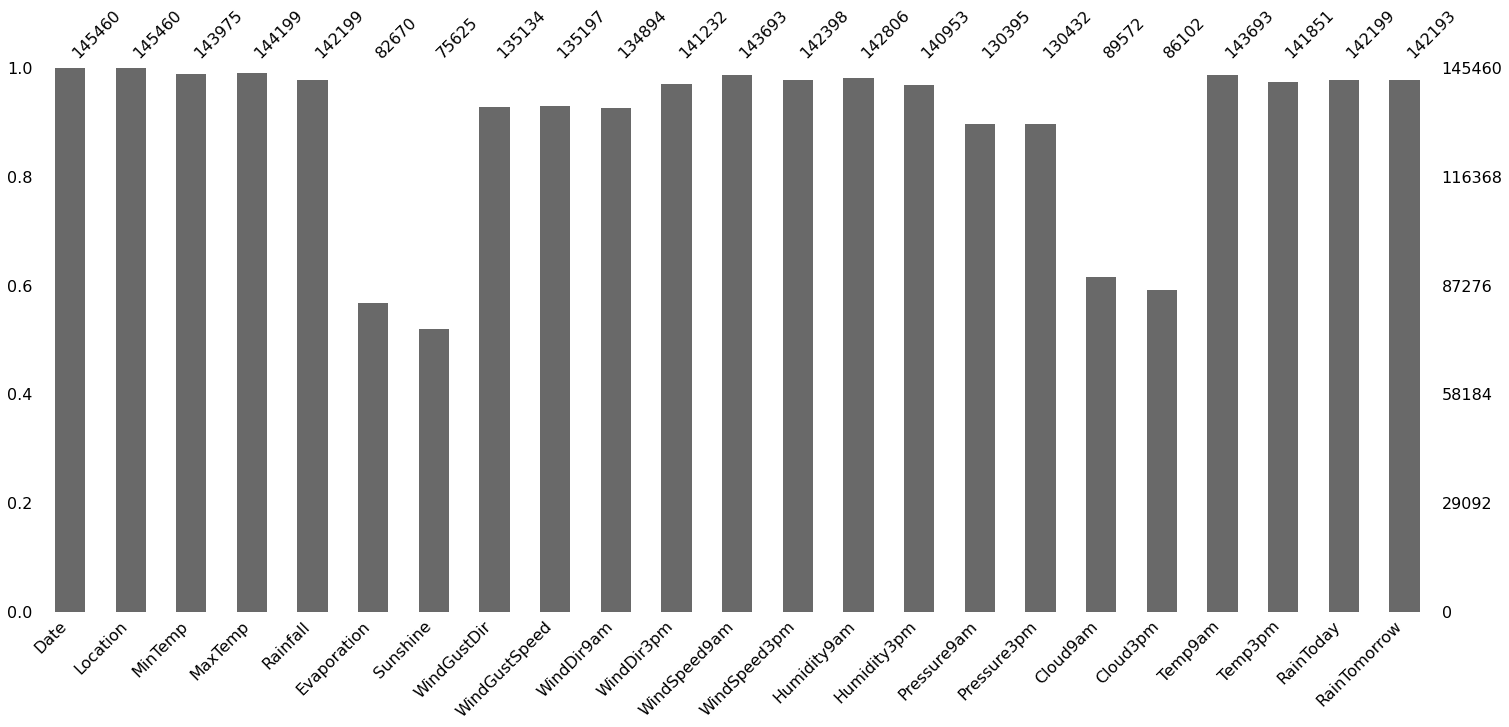

In [7]:
msno.bar(rain_data) #missing  no values

In [8]:
rain_data["RainTomorrow"]  = rain_data["RainTomorrow"].map({"Yes" : 1, "No":0})
rain_data["RainToday"]  = rain_data["RainToday"].map({"Yes" : 1, "No":0})
# print(rain_data)


print(rain_data.RainTomorrow)
print(rain_data.RainToday)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64


In [9]:
#Checking percentage of missing data in every column
(rain_data.isnull().sum()/len(rain_data))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [10]:
#Filling the missing values for continuous variables with mean
rain_data['MinTemp']=rain_data['MinTemp'].fillna(rain_data['MinTemp'].mean())
rain_data['MaxTemp']=rain_data['MinTemp'].fillna(rain_data['MaxTemp'].mean())
rain_data['Rainfall']=rain_data['Rainfall'].fillna(rain_data['Rainfall'].mean())
rain_data['Evaporation']=rain_data['Evaporation'].fillna(rain_data['Evaporation'].mean())
rain_data['Sunshine']=rain_data['Sunshine'].fillna(rain_data['Sunshine'].mean())
rain_data['WindGustSpeed']=rain_data['WindGustSpeed'].fillna(rain_data['WindGustSpeed'].mean())
rain_data['WindSpeed9am']=rain_data['WindSpeed9am'].fillna(rain_data['WindSpeed9am'].mean())
rain_data['WindSpeed3pm']=rain_data['WindSpeed3pm'].fillna(rain_data['WindSpeed3pm'].mean())
rain_data['Humidity9am']=rain_data['Humidity9am'].fillna(rain_data['Humidity9am'].mean())
rain_data['Humidity3pm']=rain_data['Humidity3pm'].fillna(rain_data['Humidity3pm'].mean())
rain_data['Pressure9am']=rain_data['Pressure9am'].fillna(rain_data['Pressure9am'].mean())
rain_data['Pressure3pm']=rain_data['Pressure3pm'].fillna(rain_data['Pressure3pm'].mean())
rain_data['Cloud9am']=rain_data['Cloud9am'].fillna(rain_data['Cloud9am'].mean())
rain_data['Cloud3pm']=rain_data['Cloud3pm'].fillna(rain_data['Cloud3pm'].mean())
rain_data['Temp9am']=rain_data['Temp9am'].fillna(rain_data['Temp9am'].mean())
rain_data['Temp3pm']=rain_data['Temp3pm'].fillna(rain_data['Temp3pm'].mean())


In [11]:
#Filling the missing values for continuous variables with mode

rain_data['RainToday']=rain_data['RainToday'].fillna(rain_data['RainToday'].mode()[0])
rain_data['RainTomorrow']=rain_data['RainTomorrow'].fillna(rain_data['RainTomorrow'].mode()[0])
rain_data['WindDir9am'] = rain_data['WindDir9am'].fillna(rain_data['WindDir9am'].mode()[0])
rain_data['WindGustDir'] = rain_data['WindGustDir'].fillna(rain_data['WindGustDir'].mode()[0])
rain_data['WindDir3pm'] = rain_data['WindDir3pm'].fillna(rain_data['WindDir3pm'].mode()[0])

In [12]:
#Checking percentage of missing data in every column after fillna

(rain_data.isnull().sum()/len(rain_data))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [14]:
rain_data.to_excel('merge.xlsx')

In [16]:
print(max(-19,9,8))

9
